# Imports & funcs

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from stats import *

from iminuit import Minuit
from iminuit.cost import LeastSquares

In [51]:
R_L = 39.4
R_g = 68
Ls = []

In [52]:
def V_RL(t,V_o,R,L,T, offset):
    return V_o* 2*(np.exp(-t*R/L) / (1 + np.exp( -T*R/L) ) ) + offset

def V_RL_2(t,V_o,R,L,T):
    return V_o* 2*(np.exp(-(t-(T/2))*R/L) / (1 + np.exp( -T*R/L) ) )

def V_RL_basic(t,V_o,tau,c):
    return V_o*(np.exp(-t/tau))+c

# RL

## R = 100 $\Omega$

127


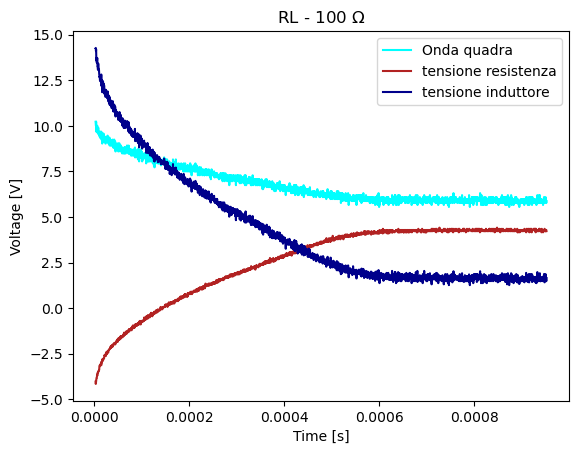

In [53]:
RL_100_quadra, RL_100_res, RL_100_ind = get_data("data/RL_100/")
if RL_100_ind[1] == None:   RL_100_ind = RL_100_quadra[0], (RL_100_quadra[1] - RL_100_res[1])

cut = True

i = 0
if cut:
    v = RL_100_quadra[1][0]
    while(v < np.max(RL_100_quadra[1])):
        v = RL_100_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 100 $\Omega$')
plt.plot(RL_100_quadra[0][i:],RL_100_quadra[1][i:], c='cyan')
plt.plot(RL_100_res[0][i:],  RL_100_res[1][i:],   c='firebrick')
plt.plot(RL_100_ind[0][i:],  RL_100_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

## R = 200 $\Omega$

127


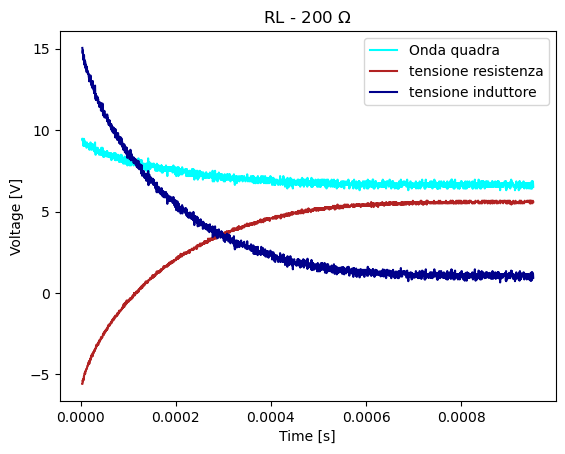

In [54]:
RL_200_quadra, RL_200_res, RL_200_ind = get_data("data/RL_200/")
if RL_200_ind[1] == None:   RL_200_ind = RL_200_quadra[0], (RL_200_quadra[1] - RL_200_res[1])

cut = True

i = 0
if cut:
    v = RL_200_quadra[1][0]
    while(v < np.max(RL_200_quadra[1])):
        v = RL_200_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 200 $\Omega$')
plt.plot(RL_200_quadra[0][i:],RL_200_quadra[1][i:], c='cyan')
plt.plot(RL_200_res[0][i:],  RL_200_res[1][i:],   c='firebrick')
plt.plot(RL_200_ind[0][i:],  RL_200_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [55]:
c = LeastSquares(RL_200_ind[0][127:],RL_200_ind[1][127:], .2, V_RL)
m = Minuit(c, R=200+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

## R = 400 $\Omega$

107


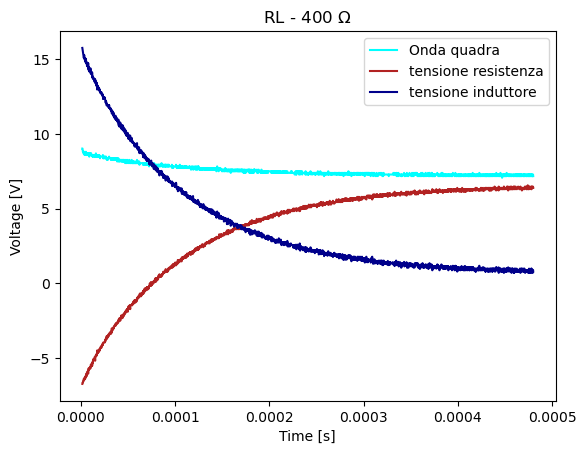

In [56]:
RL_400_quadra, RL_400_res, RL_400_ind = get_data("data/RL_400/")
if RL_400_ind[1] == None:   RL_400_ind = RL_400_quadra[0], (RL_400_quadra[1] - RL_400_res[1])

cut = True

i = 0
if cut:
    v = RL_400_quadra[1][0]
    while(v < np.max(RL_400_quadra[1])):
        v = RL_400_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 400 $\Omega$')
plt.plot(RL_400_quadra[0][i:],RL_400_quadra[1][i:], c='cyan')
plt.plot(RL_400_res[0][i:],  RL_400_res[1][i:],   c='firebrick')
plt.plot(RL_400_ind[0][i:],  RL_400_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [57]:
c = LeastSquares(RL_400_ind[0][107:],RL_400_ind[1][107:], .2, V_RL)
m = Minuit(c, R=400+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

## R = 1000 $\Omega$

107


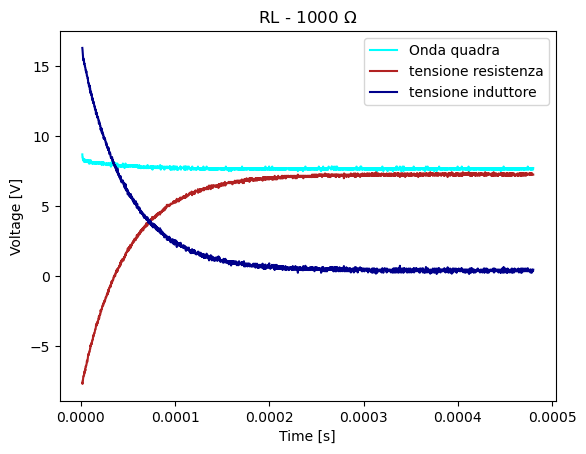

In [58]:
RL_1000_quadra, RL_1000_res, RL_1000_ind = get_data("data/RL_1000/")
if RL_1000_ind[1] == None:   RL_1000_ind = RL_1000_quadra[0], (RL_1000_quadra[1] - RL_1000_res[1])

cut = True

i = 0
if cut:
    v = RL_1000_quadra[1][0]
    while(v < np.max(RL_1000_quadra[1])):
        v = RL_1000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 1000 $\Omega$')
plt.plot(RL_1000_quadra[0][i:],RL_1000_quadra[1][i:], c='cyan')
plt.plot(RL_1000_res[0][i:],  RL_1000_res[1][i:],   c='firebrick')
plt.plot(RL_1000_ind[0][i:],  RL_1000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [59]:
c = LeastSquares(RL_1000_ind[0][107:],RL_1000_ind[1][107:], .2, V_RL)
m = Minuit(c, R=1000+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

## R = 2000 $\Omega$

107


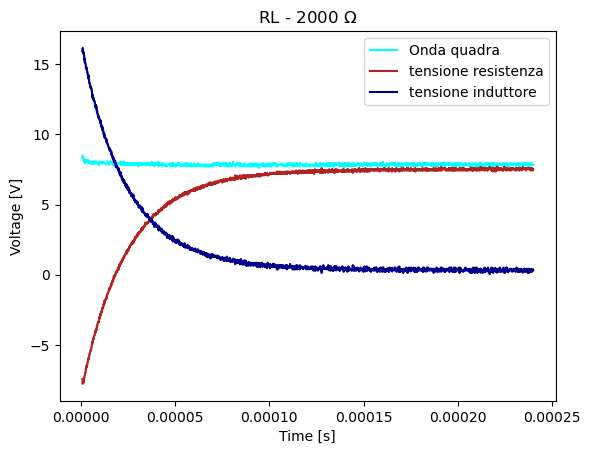

In [60]:
RL_2000_quadra, RL_2000_res, RL_2000_ind = get_data("data/RL_2000/")
if RL_2000_ind[1] == None:   RL_2000_ind = RL_2000_quadra[0], (RL_2000_quadra[1] - RL_2000_res[1])

cut = True

i = 0
if cut:
    v = RL_2000_quadra[1][0]
    while(v < np.max(RL_2000_quadra[1])):
        v = RL_2000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 2000 $\Omega$')
plt.plot(RL_2000_quadra[0][i:],RL_2000_quadra[1][i:], c='cyan')
plt.plot(RL_2000_res[0][i:],  RL_2000_res[1][i:],   c='firebrick')
plt.plot(RL_2000_ind[0][i:],  RL_2000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [61]:
c = LeastSquares(RL_2000_ind[0][107:],RL_2000_ind[1][107:], .2, V_RL)
m = Minuit(c, R=2000+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

## R = 3000 $\Omega$

88


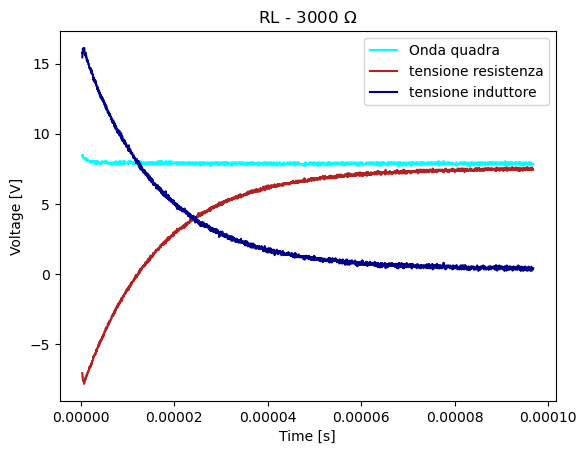

In [62]:
RL_3000_quadra, RL_3000_res, RL_3000_ind = get_data("data/RL_3000/")
if RL_3000_ind[1] == None:   RL_3000_ind = RL_3000_quadra[0], (RL_3000_quadra[1] - RL_3000_res[1])

cut = True

i = 0
if cut:
    v = RL_3000_quadra[1][0]
    while(v < np.max(RL_3000_quadra[1])):
        v = RL_3000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 3000 $\Omega$')
plt.plot(RL_3000_quadra[0][i:],RL_3000_quadra[1][i:], c='cyan')
plt.plot(RL_3000_res[0][i:],  RL_3000_res[1][i:],   c='firebrick')
plt.plot(RL_3000_ind[0][i:],  RL_3000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [63]:
c = LeastSquares(RL_3000_ind[0][107:],RL_3000_ind[1][107:], .2, V_RL)
m = Minuit(c, R=3000+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

## R = 4000 $\Omega$

87


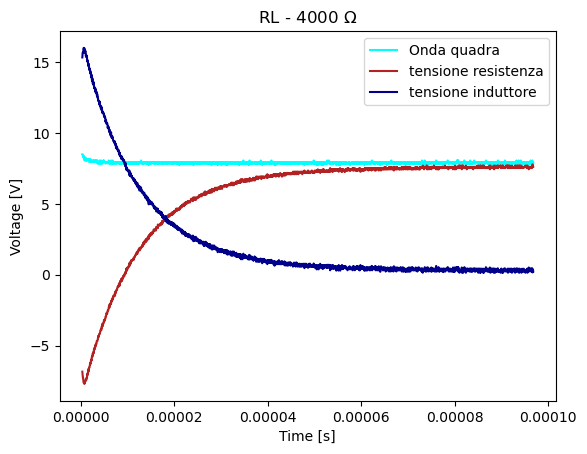

In [64]:
RL_4000_quadra, RL_4000_res, RL_4000_ind = get_data("data/RL_4000/")
if RL_4000_ind[1] == None:   RL_4000_ind = RL_4000_quadra[0], (RL_4000_quadra[1] - RL_4000_res[1])

cut = True

i = 0
if cut:
    v = RL_4000_quadra[1][0]
    while(v < np.max(RL_4000_quadra[1])):
        v = RL_4000_quadra[1][i]
        i+=1
    print(i)

plt.title('RL - 4000 $\Omega$')
plt.plot(RL_4000_quadra[0][i:],RL_4000_quadra[1][i:], c='cyan')
plt.plot(RL_4000_res[0][i:],  RL_4000_res[1][i:],   c='firebrick')
plt.plot(RL_4000_ind[0][i:],  RL_4000_ind[1][i:],   c='darkblue')
# plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])
plt.show()

In [65]:
c = LeastSquares(RL_4000_ind[0][107:],RL_4000_ind[1][107:], .2, V_RL)
m = Minuit(c, R=4000+R_g+R_L, V_o=8.3314, L= 60e-3, T=0.025, offset=0)

m.fixed['T','R'] = True
m.limits['L','R'] = (0,np.inf)
m.migrad()
m.hesse()

Ls.append(m.values['L'])
Latex(f'$L_{{ind}}$ = {m.values["L"]} $H$')

<IPython.core.display.Latex object>

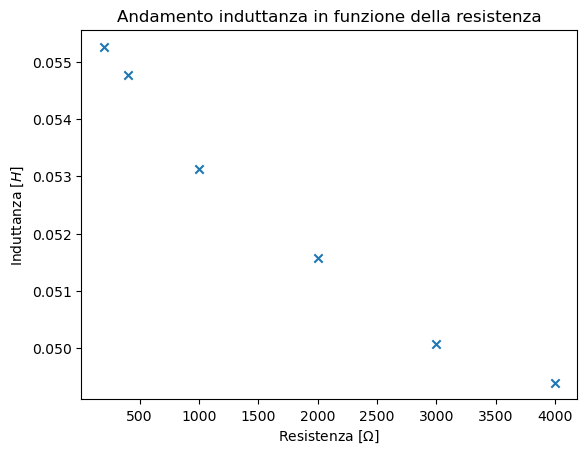

In [69]:
Rs = [200,400,1000,2000,3000,4000]
plt.title('Andamento induttanza in funzione della resistenza')
plt.xlabel('Resistenza [$\Omega$]')
plt.ylabel('Induttanza [$H$]')
plt.scatter(Rs,Ls, marker='x')